# Project overview

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. There are four datasets:

<ol>
    <li>bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]</li>
    <li>bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.</li>
    <li>bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).</li>
    <li>bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).</li>
</ol>

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, normalize, StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [2]:
bank_df = pd.read_csv('./bank-additional-full.csv', sep=';')

# Calculate Rows and Columns

In [3]:
# Menghitung jumlah baris dan kolom
rows, columns = bank_df.shape

# Menampilkan jumlah baris
print(rows, "Rows")

# Menampilkan jumlah kolom
print(columns, "Columns")

41188 Rows
21 Columns


# # Information Dataset

In [4]:
# Melihat informasi tentang dataset
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Data Preprocessing

Check for Missing Values in Dataset

In [5]:
bank_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
bank_df.head(25)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
missing_values = ['unknown']
bank_df = pd.read_csv('./bank-additional-full.csv', sep=';', na_values=missing_values)

In [8]:
bank_df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [9]:
bank_df.head(25)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,NaN,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Handling Missing Value

In [10]:
bank_df.replace(['unknown'], np.nan, inplace=True)

In [11]:
bank_df[
    bank_df=='unknown'
].count().sort_values(ascending=False)

age               0
campaign          0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
duration          0
job               0
day_of_week       0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
y                 0
dtype: int64

In [12]:
bank_df.head(25)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,NaN,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Mengganti missing value di kolom numerikal dengan mean

In [13]:
numerical_columns = list(bank_df.select_dtypes(include=['int64', 'float64']).columns.values)
bank_df[numerical_columns] = bank_df[numerical_columns].fillna(bank_df[numerical_columns].mean())

Mengganti missing value di kolom numerikal dengan median

In [14]:
categorical_columns = list(bank_df.select_dtypes(include=['object']).columns.values)
bank_df[categorical_columns] = bank_df[categorical_columns].fillna(bank_df[categorical_columns].mode().iloc[0])

In [15]:
bank_df.head(25)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,university.degree,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [16]:
bank_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Data Analysis With Visualization

1. Berapa total hasil seseorang tertarik untuk Subscribe Deposito?

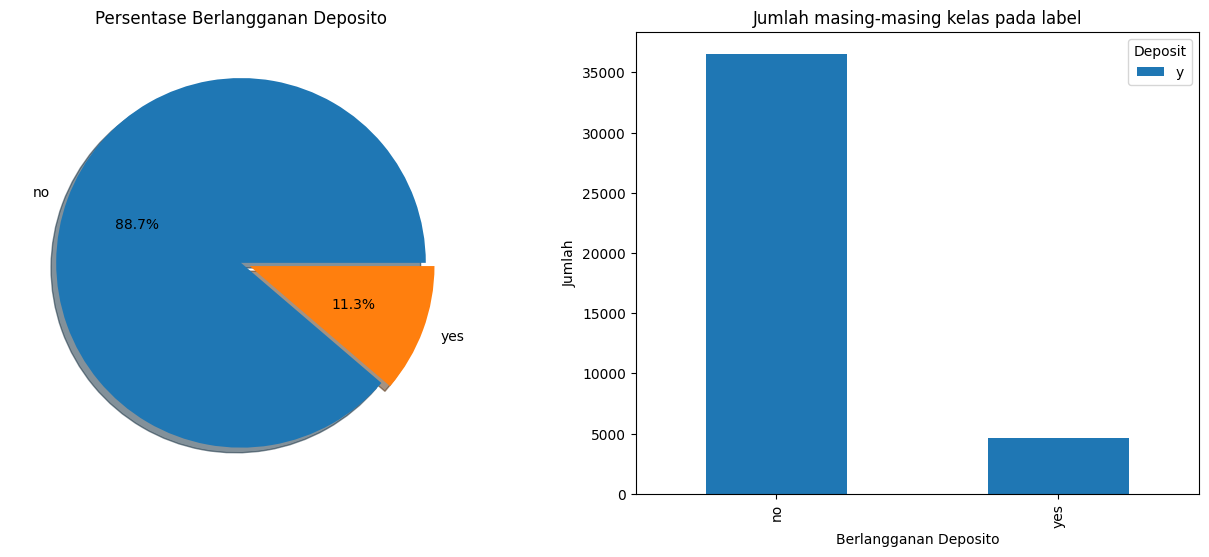

In [17]:
fig, ax = plt.subplots(1,2,figsize=(16,6))

bank_df['y'].value_counts().plot(
    kind='pie',
    autopct='%.1f%%',
    explode=[0,0.05], 
    shadow=True,
    ax=ax[0]
)
ax[0].set_title('Persentase Berlangganan Deposito')
ax[0].set_ylabel('')

bank_df.groupby('y').agg({'y':'count'}).plot(
    kind='bar',
    ax=ax[1]
)
ax[1].set_title('Jumlah masing-masing kelas pada label')
ax[1].set_ylabel('Jumlah')
ax[1].set_xlabel('Berlangganan Deposito')
ax[1].legend(title='Deposit')

Jika dilihat berdasarkan visualisasi diatas, dapat diambil kesimpulan bahwa kebanyakan orang tidak tertarik untuk melakukan subscribe deposito

Bagaimana persentase pelanggan yang berlangganan deposito berdasarkan kategori usia?

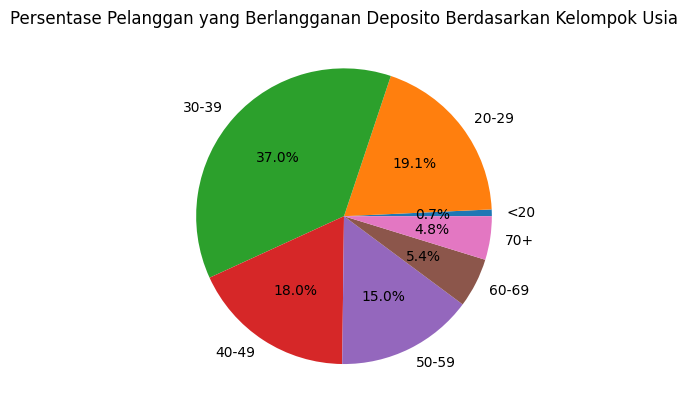

In [18]:
bins = [0, 19, 29, 39, 49, 59, 69, 120]
labels = ["<20", "20-29", "30-39", "40-49", "50-59", "60-69", "70+"]

grouped = bank_df[bank_df["y"] == "yes"].groupby(pd.cut(bank_df["age"], bins=bins, labels=labels, include_lowest=True))["y"].count()

plt.pie(grouped, labels=grouped.index, autopct="%1.1f%%")
plt.title("Persentase Pelanggan yang Berlangganan Deposito Berdasarkan Kelompok Usia")
plt.show()

Persentase Pelanggan yang Berlangganan Deposito Berdasarkan Kelompok Usia

Dari visualisasi tersebut, ditemukan bahwa mayoritas langganan deposito dilakukan oleh pelanggan dalam rentang usia 30-39, sebanyak 37%, diikuti oleh kelompok usia 40-49 yang berkontribusi sebesar 18%.

# Dataset Preprocessing before Modeling

Encoding Categorical Variables

In [19]:
from sklearn.preprocessing import OneHotEncoder

columns_to_encode = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

encoder = OneHotEncoder()

encoded_data = encoder.fit_transform(bank_df[columns_to_encode]).toarray()

encoded_bank_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns_to_encode))
bank_df_encoded = pd.concat([bank_df, encoded_bank_df], axis=1)
bank_df_encoded = bank_df_encoded.drop(columns=columns_to_encode, axis=1)

Scaling Numerical Variables

In [20]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

scaler = MinMaxScaler()

bank_df[columns_to_scale] = scaler.fit_transform(bank_df_encoded[columns_to_scale])

In [21]:
bank_df.head(25)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.481481,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no
1,0.493827,services,married,high.school,no,no,no,telephone,may,mon,...,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no
2,0.246914,services,married,high.school,no,yes,no,telephone,may,mon,...,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no
3,0.283951,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no
4,0.481481,services,married,high.school,no,no,yes,telephone,may,mon,...,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no
5,0.345679,services,married,basic.9y,no,no,no,telephone,may,mon,...,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no
6,0.518519,admin.,married,professional.course,no,no,no,telephone,may,mon,...,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no
7,0.296296,blue-collar,married,university.degree,no,no,no,telephone,may,mon,...,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no
8,0.086420,technician,single,professional.course,no,yes,no,telephone,may,mon,...,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no
9,0.098765,services,single,high.school,no,yes,no,telephone,may,mon,...,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no


# Modeling

In [22]:
# definisikan fitur X dan target y
X = bank_df_encoded.drop('y', axis=1)
y = bank_df_encoded['y']

# bagi data menjadi training set dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# buat daftar model yang akan digunakan
models = [
    ("Logistic Regression", LogisticRegression()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Support Vector Machine", SVC()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Naive Bayes", GaussianNB())
]

# Inisialisasi dictionary untuk menyimpan akurasi masing-masing model
accuracies = {}

# Loop untuk melatih dan menghitung akurasi masing-masing model
for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[model_name] = acc

# Tampilkan akurasi masing-masing model
for model_name, acc in accuracies.items():
    print(f'Akurasi {model_name}: {acc}')

Akurasi Logistic Regression: 0.9095654285020636
Akurasi K-Nearest Neighbors: 0.9016751638747269
Akurasi Support Vector Machine: 0.8945132313668366
Akurasi Decision Tree: 0.884316581694586
Akurasi Random Forest: 0.910536537994659
Akurasi Naive Bayes: 0.8630735615440641


Analisis : Model Random Forest tampil memberikan rata-rata akurasi tinggi

In [23]:
# Contoh: Melatih model Random Forest
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train, y_train)

# Membuat prediksi dengan model Random Forest
y_pred_rf = model_rf.predict(X_test)

# Hitung confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Hitung akurasi
acc_rf = accuracy_score(y_test, y_pred_rf)

print('Akurasi Random Forest:', acc_rf)

print('Confusion Matrix Random Forest:')
print(cm_rf)

print(classification_report(y_test, y_pred_rf))

Akurasi Random Forest: 0.9129643117261471
Confusion Matrix Random Forest:
[[7074  229]
 [ 488  447]]
              precision    recall  f1-score   support

          no       0.94      0.97      0.95      7303
         yes       0.66      0.48      0.55       935

    accuracy                           0.91      8238
   macro avg       0.80      0.72      0.75      8238
weighted avg       0.90      0.91      0.91      8238



Dalam rangka proses klasifikasi, saya memutuskan untuk mengadopsi algoritma Random Forest karena algoritma ini memberikan hasil yang lebih unggul dibandingkan dengan alternatif seperti Logistic Regression dan KNN. Tingkat akurasi yang dihasilkan dari hasil klasifikasi tersebut mencapai 0.91.